 Comparison

In [1]:
from __future__ import print_function
from fenics import *
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import copy
%matplotlib inline


In [2]:
from DLR import DLR

In [ ]:
"""
FEniCS tutorial demo program: Heat equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  u'= Laplace(u) + f  in the unit square
  u = u_D             on the boundary
  u = u_0             at t = 0

  u = 1 + x^2 + alpha*y^2 + \beta*t
  f = beta - 2 - 2*alpha
"""


T = 2.0            # final time
# num_steps = 2000 # number of time steps
dt = 0.0017 # time step size


# Create mesh and define function space
nx = ny = 7
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('10 * sin(pi * x[0]) * sin(pi * x[1]) + 4/3 * sin(6 * pi * x[0]) * sin(6 * pi * x[1])',degree=3) 

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)


F = u*v*dx + 0.3 * dt*dot(grad(u_n), grad(v))*dx - u_n *v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0
normlist_heat =[]
time_list=[]
l2 = norm(u_n,'l2')
time_list.append(t)
normlist_heat.append(l2)
while t <= T:

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)



    # Update previous solution
    u_n.assign(u)
    l2 = norm(u,'l2')
    time_list.append(t)
    normlist_heat.append(l2)
    
    
random_heat = DLR(dt = 0.0017,n = 7,M = 10,sample_size = 50)
random_heat.semi_implicit_simulate(end = 2)
# Hold plot
plt.plot(time_list, normlist_heat)
plt.plot(time_lsit,random_heat.L2list, "r-")
plt.yscale('log')
plt.xlabel("time")
plt.ylabel("norm")
plt.legend(['heat eq','semi_implicit'])
plt.show()


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

4.786913113651439
Solving linear variational problem.
4.734960506203008
4.684610049651028
4.634995385860745
4.585946679505005
4.537425964822177
4.489420994368825
4.441924792038764
4.39493157021891
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
4.348435869220968
4.302432360639759
Solving linear variational problem.
Solving linear variational problem.
4.256915796900056
4.211880996119851
Solving linear variational problem.
4.16732283657158
4.123236254119657
4.079616240711238
4.036457843289868
3.99375616290135
3.9515063538990955
3.9097036232081637
3.868343229628488
3.827420483167072
3.786930744393269
3.7468694238134717
3.707231981262687
3.668013925311179
3.6292108126847773
3.5908182476977384
3.552831881697214
3.515247

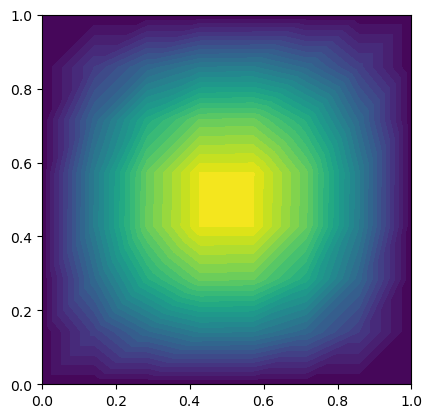

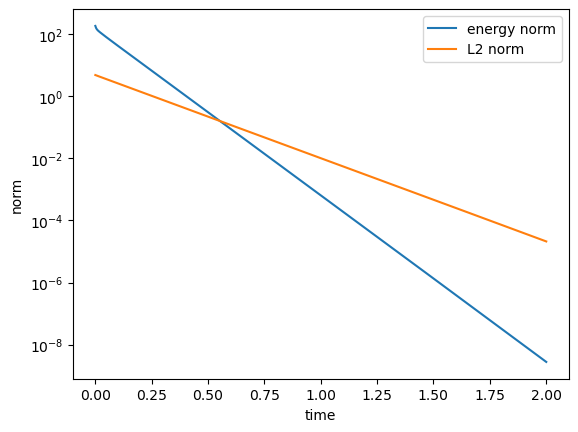

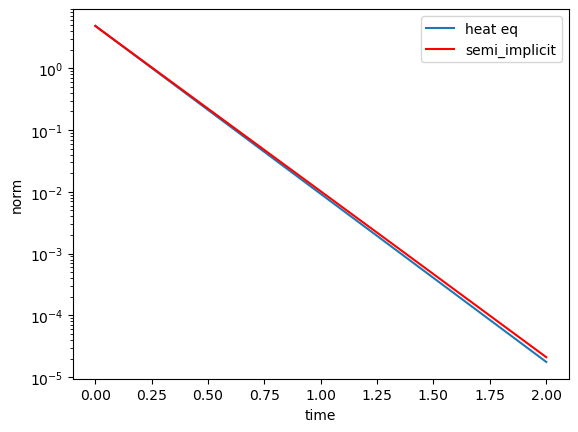

In [20]:
"""
FEniCS tutorial demo program: Heat equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  u'= Laplace(u) + f  in the unit square
  u = u_D             on the boundary
  u = u_0             at t = 0

  u = 1 + x^2 + alpha*y^2 + \beta*t
  f = beta - 2 - 2*alpha
"""


T = 2           # final time
# num_steps = 2000 # number of time steps
dt = 0.0017 # time step size


# Create mesh and define function space
nx = ny = 7
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('10 * sin(pi * x[0]) * sin(pi * x[1]) + 4/3 * sin(6 * pi * x[0]) * sin(6 * pi * x[1])',degree=3) 

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)


F = u*v*dx + 0.3 * dt*dot(grad(u_n), grad(v))*dx - u_n *v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0
normlist_heat =[]
time_list=[]
l2 = norm(u_n,'l2')
time_list.append(t)
normlist_heat.append(l2)
while t <= T:

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)



    # Update previous solution
    u_n.assign(u)
    l2 = norm(u,'l2')
    print(l2)
    time_list.append(t)
    normlist_heat.append(l2)
    
    
random_heat = DLR(dt = 0.0017,n = 7,M = 10,sample_size = 50)
random_heat.semi_implicit_simulate(end = 2)
# Hold plot
plt.plot(time_list, normlist_heat)
plt.plot(time_list,random_heat.L2list, "r-")
plt.yscale('log')
plt.xlabel("time")
plt.ylabel("norm")
plt.legend(['heat eq','semi_implicit'])
plt.show()


Calling FFC just-in-time (JIT) compiler, this may take some time.
4.8274088226308915Solving linear variational problem.

4.81058017421249
4.7943532674774465
4.778558754185217
4.763078958410364
4.747832085605561
4.732761254604189
4.7178268831114085
4.703001402520969
4.688265589656677
4.673606020535064
4.65901330261896
4.644480847218212
4.630004016711749
4.615579531921206
4.601205060096655
4.586878928334411
4.572599924137711
4.558367156544149
4.544179959367741
4.530037823739523
4.515940351041462
4.5018872200433355
4.487878163937415
4.473912954275271
4.459991389721204
4.446113288169525
4.432278481213009
4.418486810256217
4.404738123780723
4.391032275417768
4.377369122587654
4.363748525537341
4.350170346658261
4.336634450001581
4.323140700932837
4.309688965885135
4.296279112182119
4.2829110079105295
4.269584521828012
4.25629952329607
4.243055882231011
4.229853469067783
4.216692154733106
4.203571810625309
4.190492308599006
4.1774535209533274
4.164455320422735
4.151497580169727
4.13858017377

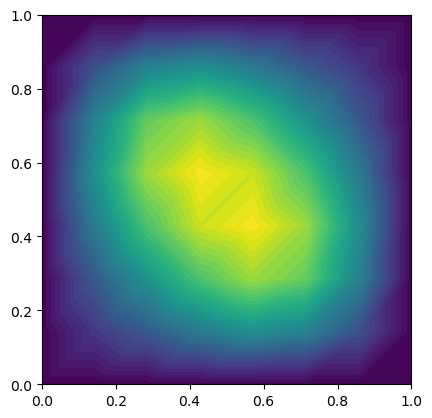

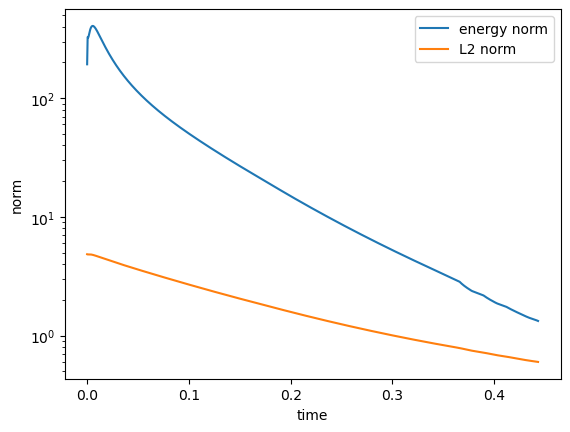

AttributeError: 'DLR' object has no attribute 'time_list'

In [23]:
"""
FEniCS tutorial demo program: Heat equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  u'= Laplace(u) + f  in the unit square
  u = u_D             on the boundary
  u = u_0             at t = 0

  u = 1 + x^2 + alpha*y^2 + \beta*t
  f = beta - 2 - 2*alpha
"""


T = 2           # final time
# num_steps = 2000 # number of time steps
dt = 0.0005 # time step size


# Create mesh and define function space
nx = ny = 7
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('10 * sin(pi * x[0]) * sin(pi * x[1]) + 4/3 * sin(6 * pi * x[0]) * sin(6 * pi * x[1])',degree=3) 

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)


F = u*v*dx + 0.3 * dt*dot(grad(u_n), grad(v))*dx - u_n *v*dx
a, L = lhs(F), rhs(F)

# Time-stepping
u = Function(V)
t = 0
normlist_heat =[]
time_list=[]
l2 = norm(u_n,'l2')
time_list.append(t)
normlist_heat.append(l2)
while t <= T:

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)



    # Update previous solution
    u_n.assign(u)
    l2 = norm(u,'l2')
    print(l2)
    time_list.append(t)
    normlist_heat.append(l2)
    
    
random_heat = DLR(dt = 0.0005,n = 7,M = 10,sample_size = 50)
random_heat.explicit_simulate(end = 2)
# Hold plot
plt.plot(random_heat.time_list, normlist_heat[:len(random_heat.time_list)])
plt.plot(random_heat.time_list,random_heat.L2list, "r-")
plt.yscale('log')
plt.xlabel("time")
plt.ylabel("norm")
plt.legend(['heat eq','explicit'])
plt.show()


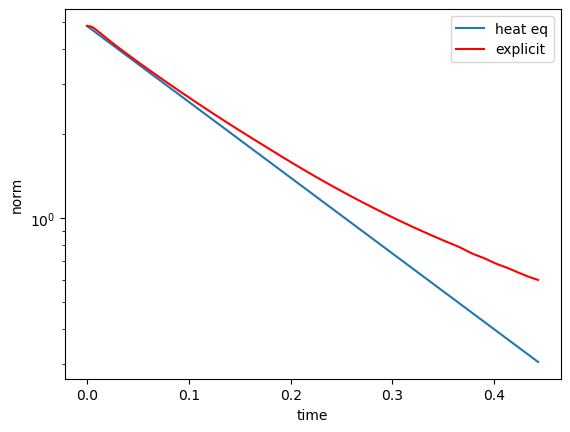

In [24]:
plt.plot(random_heat.timelist, normlist_heat[:len(random_heat.timelist)])
plt.plot(random_heat.timelist,random_heat.L2list, "r-")
plt.yscale('log')
plt.xlabel("time")
plt.ylabel("norm")
plt.legend(['heat eq','explicit'])
plt.show()

Error analysis

we think about the error of this function in finite element space.
\begin{equation*}
    u(x,y) = \sum_{j \geq 1} \frac{y_j}{j^\alpha} sin(j\pi x)
\end{equation*}
where $x\in[0,1] = D$, $y\sim u(-1,1)$, $\alpha >1/2$(for the convergence)

For the computation, instead of infinite sum, we consider finite sum. Furthemore, we will project it into finite element space. That is,
\begin{equation*}
u(x,y) \approx \sum_{j \geq 1}^K \frac{y_j}{j^\alpha} sin(j\pi x)  \approx u_h(x,y) = \sum_{i=1}^{N_h} v_i(y) \phi_i(x) 
\end{equation*}

In [ ]:
#smootheness
alpha = 0.3
#order of summation
K = 2
#degree of polynomial
p=1
# The number of meshes
M = 1000
#length of interval
h = 2/M
# The number of sampling
N = 100

def error(r=p,M=M,N=N):
    #random vector
    # y = np.random.uniform(low=-1.0, high=1.0, size=(N,K))
    y = np.random.uniform(low=-1.0, high=1.0, size=(K))
    
    mesh = IntervalMesh(M,-1,1)
    
    V = FunctionSpace(mesh,"P", r)
    
    u = Function(V)

    
    u_j_list=[]

    str = "y[0]/pow(1,alpha)*sin(1*pi*x[0])"
    for j in range(1,K):
        str += f"　+ y[{j}]/pow({j},alpha)*sin({j+1}*pi*x[0])"

    print(str)
    expr = Expression(str, degree=r+3,y=Constant(y), alpha=alpha)

    u_h = interpolate(expr, V)

    err = errornorm(expr, u_h)
    print(err)
    
    
    # for i in range(N):
    #     for j in range(1,K+1):
    #         u_j.j = j
    #         u_j.y_j = y[i][j-1]
    #         u.vector()[:] += ( interpolate(u_j, V) ).vector()
    # u.vector()[:] /= N
        
    # zero = Constant(0.0)
    # zero = interpolate(zero,V)
    # error_L2 = errornorm(u,zero, 'L2')
    
    # return error_L2 * error_L2

    


In [ ]:
for l in range(5):
    M = 2**l
    M_ = 2**(l-1)
    h_l= 1/M
    h_l_ = 1/M_
    u_h_l =
    u_h_l_ = 
    delta_l = 
    r_list=[]
    error_list=[]
    for r in range(N_h):
        


In [ ]:
V = FunctionSpace(mesh, ’P’, 1)
u = interpolate(Expression(’x[0] + x[1]’, degree=1), V)

def decompose(u,r):
    for u_i in u:
        
    nodal_values = u.vector().array(
    v2d = vertex_to_dof_map(V)
    nodal_value(v2d)